In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly_express as plot

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score


In [2]:
train = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
test = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/test.csv')

In [3]:
train.head(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1


In [4]:
test.head(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53


In [5]:
testid = test['id']
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [6]:
cateforical = ['Gender','Vehicle_Age','Vehicle_Damage']

In [7]:
def get_unique(data,columns):
    return {column : list(data[column].unique()) for column in columns}

In [8]:
get_unique(train, cateforical)

{'Gender': ['Male', 'Female'],
 'Vehicle_Age': ['> 2 Years', '1-2 Year', '< 1 Year'],
 'Vehicle_Damage': ['Yes', 'No']}

In [9]:
binary_categorical = ['Gender','Vehicle_Damage']
ordinal_categorical = ['Vehicle_Age']

In [10]:
def binaryc(data,columns):
    encoder = LabelEncoder()
    for col in columns:
        data[col] = encoder.fit_transform(data[col])
    return data

In [11]:
train = binaryc(train,binary_categorical)
test = binaryc(train,binary_categorical)

In [12]:
ordinal = sorted(list(train['Vehicle_Age'].unique()))


In [13]:
train['Vehicle_Age'] = train['Vehicle_Age'].apply(lambda x : ordinal.index(x))

In [14]:
train.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [15]:
test.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [16]:
y = train['Response']
x = train.drop('Response',axis=1)

<Axes: >

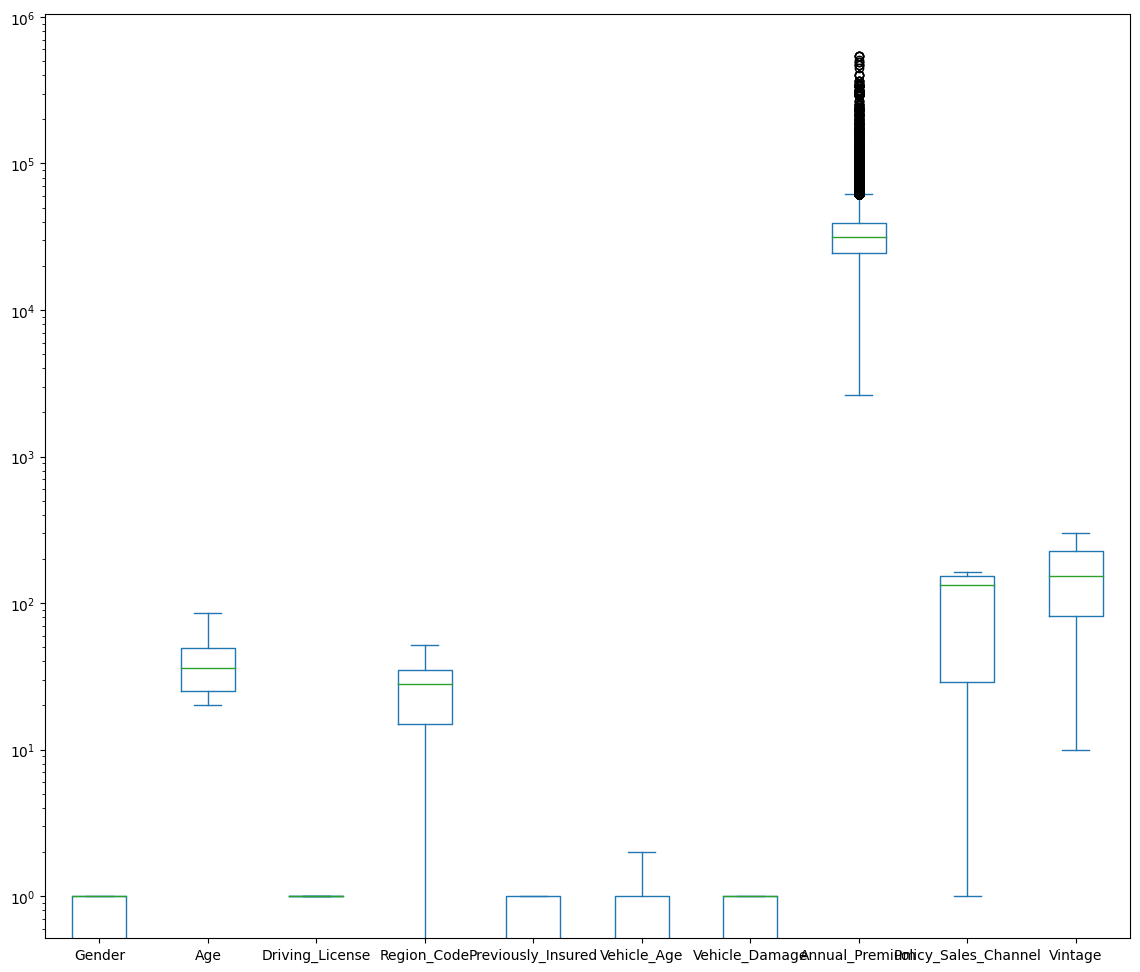

In [17]:
x.plot(kind='box',figsize=(14,12),logy=True)

In [18]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [ ]:
inputs = tf.keras.Input(10)
x = tf.keras.layers.Dense(64,activation='relu')(inputs)
x = tf.keras.layers.Dense(64,activation='relu')(x)
output =  tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs,outputs=output)

model.compile(
optimizer = 'adam',
loss = 'binary_crossentropy',
metrics=[tf.metrics.AUC(name='auc')]
)

epochs = 2
batch_size = 10
hist = model.fit(x_train,y_train,
         validation_split=0.2,
         batch_size = batch_size
        ,epochs = epochs
         , callbacks=tf.keras.callbacks.ReduceLROnPlateau(verbose=1)
         ,verbose=0)

In [ ]:
plt.figure(figsize=(8,3))
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(range(1,epochs+1), train_loss  , label='Training Loss')
plt.plot(range(1,epochs+1 ), val_loss , label='Validation Loss' )
plt.title('Training And Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
pred = model.predict(x_test)

In [ ]:
pd.Series(pred)

In [ ]:
map(lambda x : 1 if x > 0.5 else 0 )

In [ ]:
x_test